<a href="https://colab.research.google.com/github/benbaz-2/comp551/blob/main/assignment1_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Package imports

In [1]:
pip install ucimlrepo;

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split
import pdb
import time

### Importing data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### Data cleaning and exploratory data analysis

In [4]:
# Taking a look at the data
# The data looks like it was already processed
pd.set_option('display.max_columns', None)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [5]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [6]:
# Checking for missing values
# Great, no missing values
X.isnull().sum()

,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


In [7]:
y.isnull().sum()

,0
Diabetes_binary,0


In [8]:
# looking at descriptive statistics and variable distributions
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
#X.hist(figsize=(20,20));

In [10]:
# scaling data
numerical = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

for n in numerical:
  if n in numerical:
    X.loc[:,n] = (X[n] - X[n].mean()) / X[n].std()

In [11]:
#X.hist(figsize=(20,20))


Class distribution:
{0: 0.8606669820245979, 1: 0.13933301797540207}


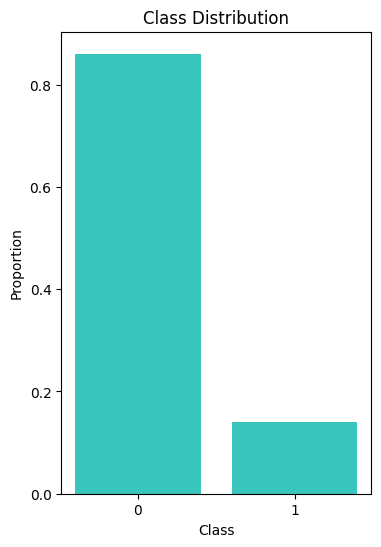

In [12]:
# Calculate class distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts / len(y)))

print("\nClass distribution:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(4, 6))
plt.bar([str(k) for k in class_distribution.keys()], class_distribution.values(), color = "#39C5BB")
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()

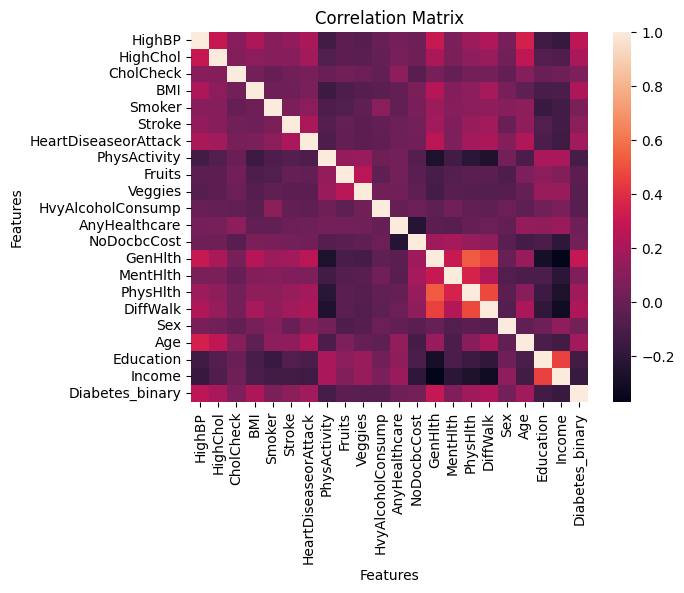

In [13]:
# looking at correlations
combined = pd.concat([X, y], axis=1)
corr = combined.corr()
sns.heatmap(corr)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix')
plt.show()

### Implementing the model

In [14]:
class LogisticRegression:
    def __init__(self, add_bias=True, learning_rate=0.004, epsilon=0.12, max_iters=1e5 / 2, batch_size=False, verbose=True, get_time=True):
      self.add_bias = add_bias
      self.learning_rate = learning_rate
      self.epsilon = epsilon
      self.max_iters = max_iters
      self.batch_size = batch_size
      self.verbose = verbose
      self.get_time = get_time
      self.w = None
      self.num_iter = None
      self.time = None
      self.gs = []
      pass

    def logistic(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, x, y): # careful if using this because w has an extra element for the bias                                                     # Entropy loss
        #return np.mean(y * np.log1p(np.exp(-np.dot(x, self.w[:-1, :]))) + (1-y) * np.log1p(np.exp(np.dot(x, self.w[:-1, :])))) # without bias
        #return np.mean(y * np.log1p(self.logistic(np.dot(x, self.w))) + (1-y) * np.log1p(1 - self.logistic(np.dot(x, self.w)))) # with bias
        N = len(y)
        predictions = self.logistic(np.dot(x, self.w[:-1, :]))
        return -np.mean(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))  # Added small value for numerical stability


    def gradient(self, x, y):
        return np.dot(x.T, self.logistic(np.dot(x, self.w)) - y) / len(y)

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros((D, 1))
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        start = time.time()                                             # This is to get the time for gradient descent to run
        if not self.batch_size:                                              # This is for full batch gradient descent
          while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
              g = self.gradient(x, y)
              self.gs.append(np.linalg.norm(g))
              self.w = self.w - self.learning_rate * g
              t += 1
        else:                                                           # This is for mini-batch gradient descent
            while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
                # Randomly sample a mini-batch from the data
                #sampled_data = pd.DataFrame(np.column_stack((x, y))).sample(n=batch_size, replace=False)
                #x_batch = np.array(sampled_data.iloc[:, :-1])  # Features for the batch
                #y_batch = np.array(sampled_data.iloc[:, -1:])  # Targets for the batch
                indices = np.random.choice(N, size=self.batch_size, replace=False)
                x_batch = x[indices, :]
                y_batch = y[indices, :]

                g = self.gradient(x_batch, y_batch)  # Calculate the gradient
                self.gs.append(np.linalg.norm(g))
                self.w = self.w - self.learning_rate * g  # Update weights using gradient descent
                t += 1  # Increment the iteration counter
        end = time.time()
        self.num_iter = t
        self.time = end - start

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'time taken: {end - start}\n')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = self.logistic(np.dot(x,self.w))            #predict output
        return yh


### Fitting the data

In [15]:
# Train-test split
def split(X, y, test_size=0.2, random_state=None):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  x_train = x_train.to_numpy()
  x_test = x_test.to_numpy()
  y_train = y_train.to_numpy().reshape(-1, 1)
  y_test = y_test.to_numpy().reshape(-1, 1)
  return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = split(X, y, random_state=42)

In [16]:
model = LogisticRegression(epsilon=0.05)
model.fit(x_train, y_train)

terminated after 1830 iterations, with norm of the gradient equal to 0.0499957716397979
time taken: 20.671205520629883



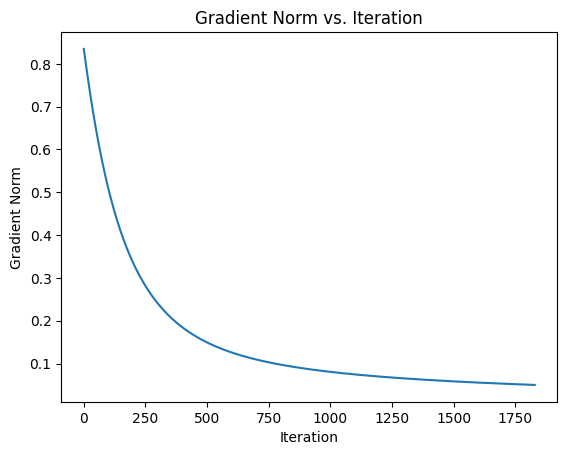

In [17]:
plt.plot(model.gs)
plt.title('Gradient Norm vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.show()

In [18]:
yh = model.predict(x_test)

### Measuring performance

In [19]:
# Very similar, which is good but apparently this is an average value so the model could be optimized
entropy = lambda y, yh: np.mean(y * np.log1p(yh) + (1-y) * np.log1p(1 - yh))
yh_train = model.predict(x_train)
entropy(y_test, yh), entropy(y_train, yh_train)

(0.5635695554085081, 0.5628659919063054)

In [20]:
# True positive and false negatives

yh = model.predict(x_test)
yh = pd.DataFrame(yh)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y1 = pd.DataFrame()
y1['actual'] = y_test
y1['predicted'] = [1 if x >= .5 else 0 for x in yh[0]]
y1['correct'] = (y1['actual'] == y1['predicted']).astype(int)
correct = sum(y1['correct'])
wrong = len(y1) - correct
total = len(y1)
true_positive = sum((y1['predicted'] == 1) & (y1['actual'] == 1))
true_negative = sum((y1['predicted'] == 0) & (y1['actual'] == 0))
false_positive = sum((y1['predicted'] == 1) & (y1['actual'] == 0))
false_negative = sum((y1['predicted'] == 0) & (y1['actual'] == 1))
print(f'total: {total}, correct: {correct}, wrong: {wrong}, accuracy: {correct/total}')
confusion_matrix = pd.DataFrame(
    [[true_negative, false_positive],
     [false_negative, true_positive]],
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative', 'Predicted Positive'])
confusion_matrix

total: 50736, correct: 43733, wrong: 7003, accuracy: 0.8619717754651529


,Predicted Negative,Predicted Positive
Actual Negative,43309,430
Actual Positive,6573,424


In [21]:
# Having high general health leads to diabetes???
weights = pd.DataFrame(model.w, index=(list(X.columns)) + ['Bias'], columns=['weights'])
weights.sort_values('weights', ascending=False)

,weights
GenHlth,0.322747
Age,0.274565
BMI,0.269382
PhysHlth,0.100494
HighBP,0.052014
HeartDiseaseorAttack,0.049984
DiffWalk,0.021146
Stroke,0.015217
HighChol,0.011340
MentHlth,-0.000364


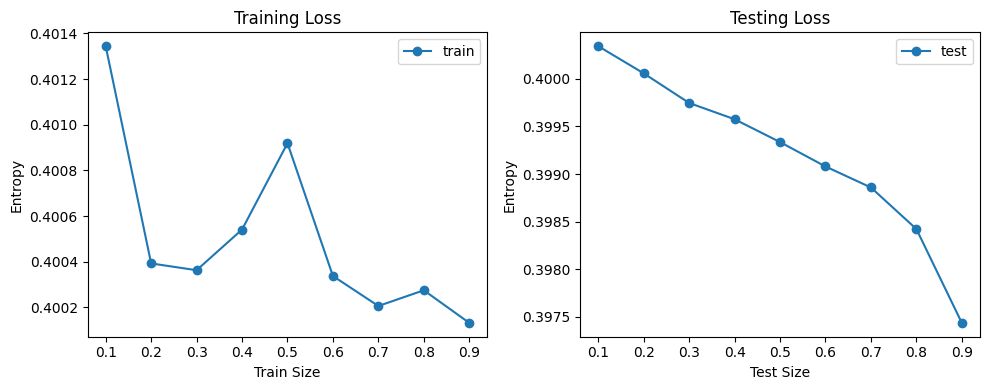

In [23]:
# Taking a look at the effect of size of training data

y_train_losses = []                                                                          # average value of cost function in training set
y_test_losses = []                                                                           # average value of cost function in test set
train_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]                                  # size of training set

for i in train_size:
  x_train, x_test, y_train, y_test = split(X, y, random_state=42, test_size=(1-i)) # Train-test split
  model = LogisticRegression(verbose=False)                                                                # Initialize model
  model.fit(x_train, y_train)                                                               # Fit model
  yh_train = model.predict(x_train)
  yh_test = model.predict(x_test)
  loss_train = model.cost(x_train, y_train)
  loss_test = model.cost(x_test, y_test)
  y_train_losses.append(loss_train)                                                          # appending to list
  y_test_losses.append(loss_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(train_size, y_train_losses, label='train', marker='o')
ax2.plot(train_size, y_test_losses, label='test', marker='o')

ax1.set_xlabel('Train Size')
ax2.set_xlabel('Test Size')
ax1.set_ylabel('Entropy')
ax2.set_ylabel('Entropy')
ax1.set_title('Training Loss')
ax2.set_title('Testing Loss')
ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

### Experiments

In [ ]:
# Minibatch SGD

x_train, x_test, y_train, y_test = split(X, y, random_state=42)

sizes = [2, 4, 8, 16, 32, 64, 128, 256]
losses_batch = []                   # Will strore rmse for each batch size
gss_batch = []                    # will store gradient norms for each batch size
t_batch = []                      # will store time for each batch size
n_iter_batch = []                 # will store number of iterations for each batch size

for s in sizes:
  model = LogisticRegression(batch_size=s, epsilon=0.1)
  model.fit(x_train, y_train)
  yh = model.predict(x_test)
  losses_batch.append(model.cost(x_test, y_test))
  gss_batch.append(model.gs)
  t_batch.append(model.time)
  n_iter_batch.append(model.num_iter)

terminated after 3664 iterations, with norm of the gradient equal to 0.08605540335126724
time taken: 17.034146547317505

terminated after 2766 iterations, with norm of the gradient equal to 0.0985376029396322
time taken: 12.1072518825531

terminated after 6534 iterations, with norm of the gradient equal to 0.09357731583117948
time taken: 29.86874508857727



In [26]:
# Different learning rates
learning_rates = [.0001, .001, 0.01, 0.1]
losses_lr = []
gss_lr = []
t_lr = []
n_iter_lr = []


for l in learning_rates:
  model = LogisticRegression(learning_rate=l, batch_size=256, epsilon=0.1)
  model.fit(x_train, y_train)
  yh = model.predict(x_test)
  losses_lr.append(model.cost(x_test, y_test))
  gss_lr.append(model.gs)
  t_lr.append(model.time)
  n_iter_lr.append(model.num_iter)

KeyboardInterrupt: 

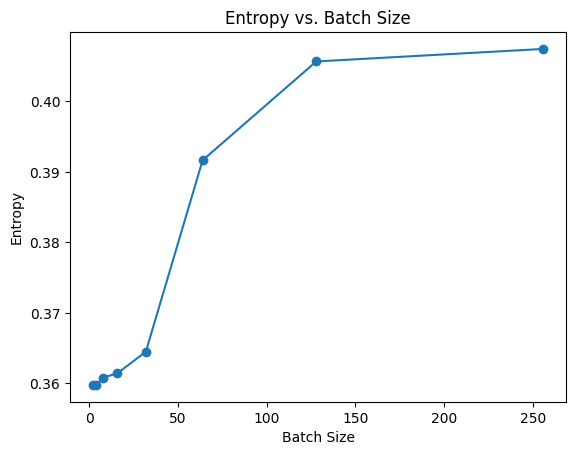

In [ ]:
plt.plot(sizes, losses_batch, label='RMSE', marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Entropy')
plt.title('Entropy vs. Batch Size')
plt.show()

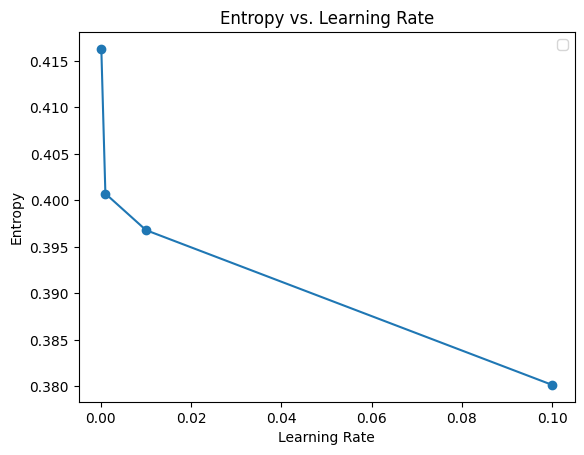

In [ ]:
plt.plot(learning_rates, losses_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Entropy')
plt.title('Entropy vs. Learning Rate')
plt.show()

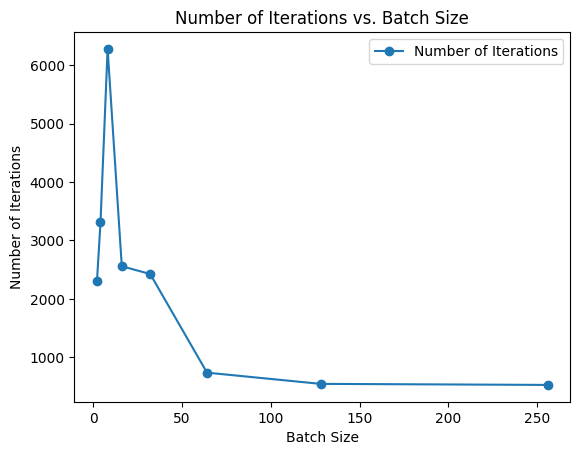

In [ ]:
plt.plot(sizes, n_iter_batch, label='Number of Iterations', marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs. Batch Size')

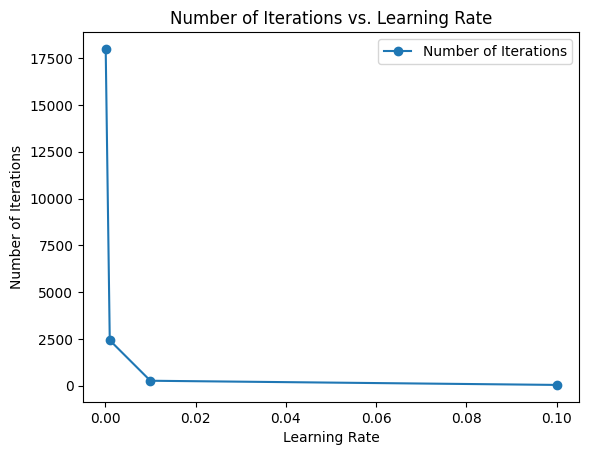

In [ ]:
plt.plot(learning_rates, n_iter_lr, label='Number of Iterations', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs. Learning Rate')

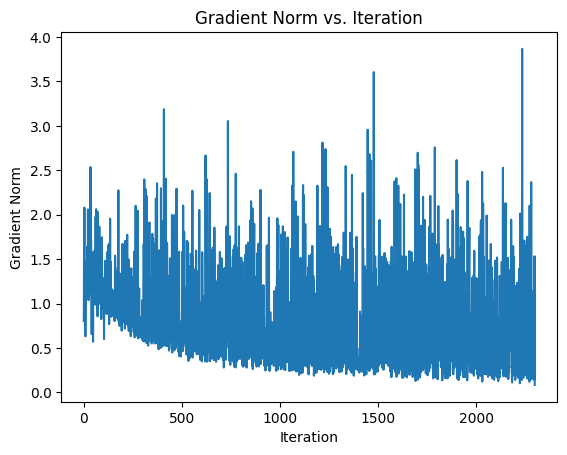

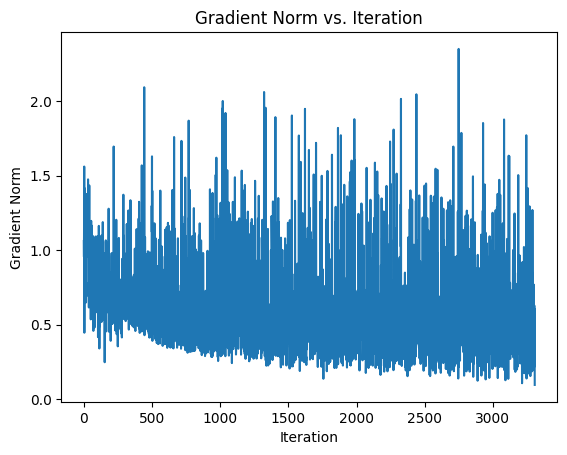

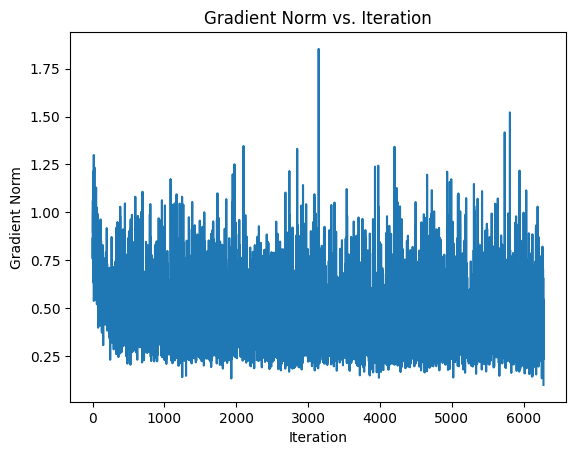

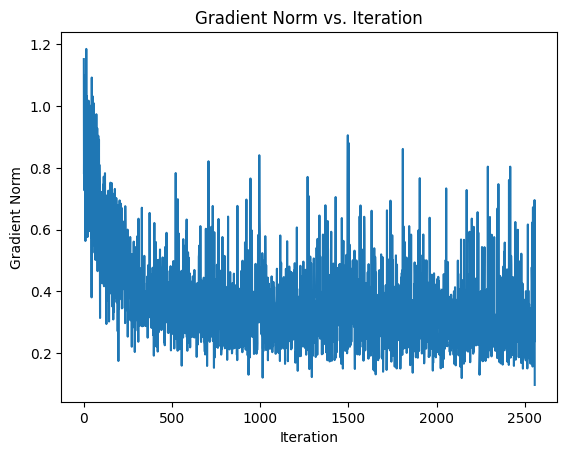

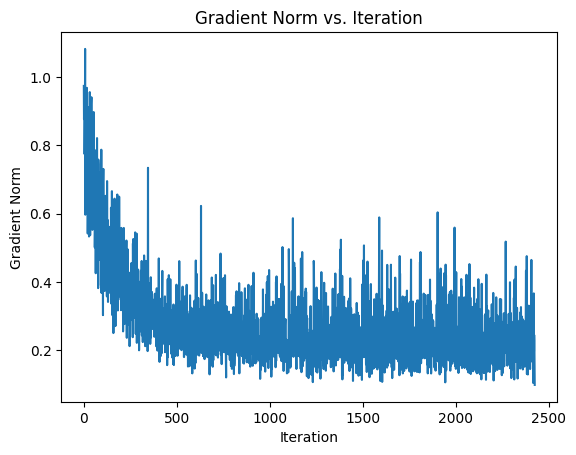

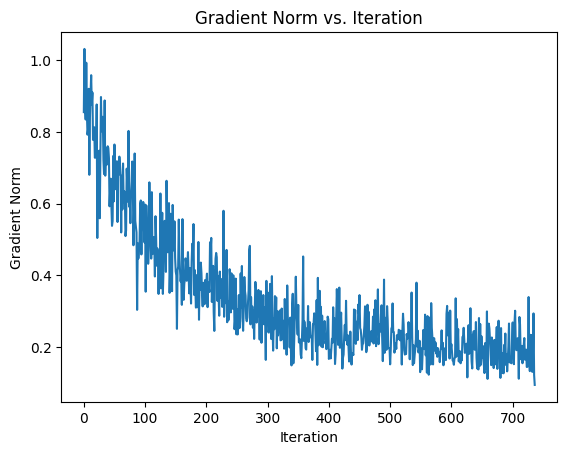

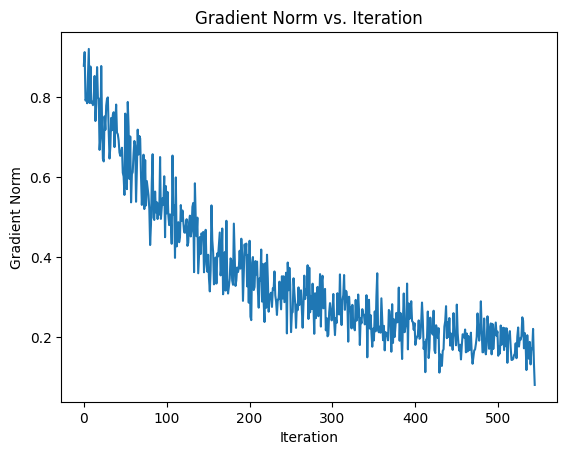

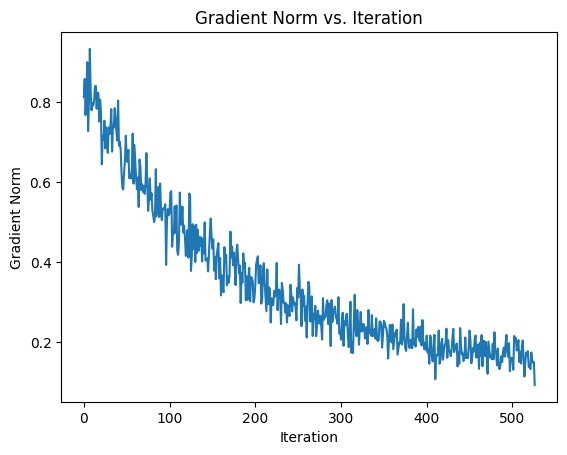

In [ ]:
for i,g in enumerate(gss_batch):
  plt.plot(g)
  plt.title(f'Gradient Norm vs. Iteration at batch size:{sizes[i]}')
  plt.xlabel('Iteration')
  plt.ylabel('Gradient Norm')
  plt.show()

In [25]:
for i, g in enumerate(gss_lr):
  plt.plot(g)
  plt.title(f'Gradient Norm vs. Iteration at learning rate {learning_rates[i]}')
  plt.xlabel('Iteration')
  plt.ylabel('Gradient Norm')
  plt.show()

NameError: name 'gss_lr' is not defined